In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
dataset = pd.read_csv('PIMA.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.columns
df= dataset

In [18]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual filename and path

df = df[df['Outcome']==1]
# Continuous variables
continuous_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
continuous_stats = df[continuous_vars].describe().loc[['mean', 'std']].T
continuous_stats['mean ± SD'] = continuous_stats['mean'].round(2).astype(str) + ' ± ' + continuous_stats['std'].round(2).astype(str)
continuous_stats.drop(['mean', 'std'], axis=1, inplace=True)
print("Mean ± SD for continuous variables:")
print(continuous_stats)


# Statistical tests
independent_t_results = {}
chi_square_results = {}

# Perform independent t-tests
for var in continuous_vars:
    t_stat, p_value = stats.ttest_ind(df[df['Outcome'] == 1][var], df[df['Outcome'] == 0][var])
    independent_t_results[var] = {'t-statistic': t_stat, 'p-value': p_value}



print("\nIndependent t-test results:")
for var, results in independent_t_results.items():
    print(f"{var}: t-statistic={results['t-statistic']:.2f}, p-value={results['p-value']:.18f}")


Mean ± SD for continuous variables:
                                mean ± SD
Pregnancies                   4.87 ± 3.74
Glucose                    141.26 ± 31.94
BloodPressure               70.82 ± 21.49
SkinThickness               22.16 ± 17.68
Insulin                   100.34 ± 138.69
BMI                          35.14 ± 7.26
DiabetesPedigreeFunction      0.55 ± 0.37
Age                         37.07 ± 10.97

Independent t-test results:
Pregnancies: t-statistic=nan, p-value=nan
Glucose: t-statistic=nan, p-value=nan
BloodPressure: t-statistic=nan, p-value=nan
SkinThickness: t-statistic=nan, p-value=nan
Insulin: t-statistic=nan, p-value=nan
BMI: t-statistic=nan, p-value=nan
DiabetesPedigreeFunction: t-statistic=nan, p-value=nan
Age: t-statistic=nan, p-value=nan


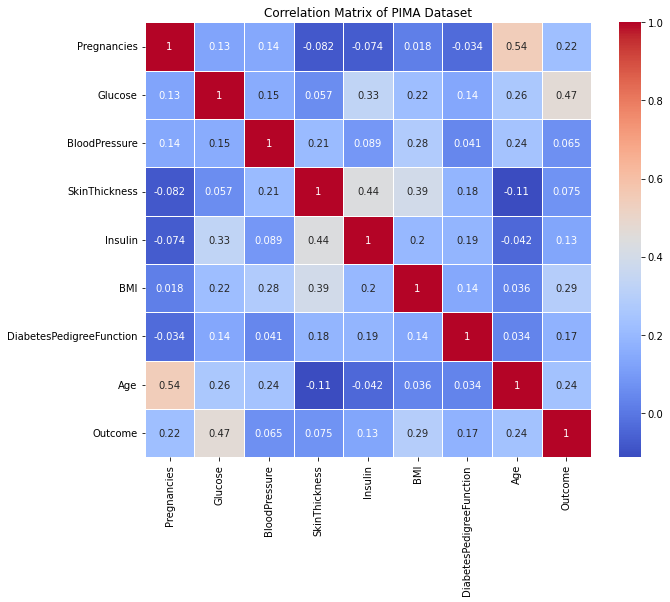

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of PIMA Dataset')
plt.show()

In [8]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Load the PIMA dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFn", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Calculate statistics for continuous variables (mean ± SD)
continuous_columns = df.select_dtypes(include=["float64", "int64"]).columns
continuous_stats = df[continuous_columns].describe()

# Calculate frequency (%) for categorical variables
categorical_columns = ["Outcome"]  # "Outcome" is the only categorical column in the PIMA dataset
categorical_stats = df[categorical_columns].apply(lambda x: x.value_counts(normalize=True) * 100)

# Independent t-tests for continuous variables
t_test_results = {}
for column in continuous_columns:
    diabetic_values = df[df["Outcome"] == 1][column]
    non_diabetic_values = df[df["Outcome"] == 0][column]
    t_statistic, p_value = ttest_ind(diabetic_values, non_diabetic_values)
    t_test_results[column] = {"t_statistic": t_statistic, "p_value": p_value}

# Chi-square tests for categorical variables
chi_square_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df["Outcome"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {"chi2": chi2, "p_value": p}

# Correlation analysis
correlation_matrix = df.corr(method="pearson")

# Print the results
print("Continuous Variables Summary:")
print(continuous_stats)
print("\nCategorical Variables Summary:")
print(categorical_stats)
print("\nIndependent t-Tests Results:")
for column, result in t_test_results.items():
    print(f"{column}: t-statistic = {result['t_statistic']}, p-value = {result['p_value']}")
print("\nChi-square Tests Results:")
for column, result in chi_square_results.items():
    print(f"{column}: chi2 = {result['chi2']}, p-value = {result['p_value']}")
print("\nCorrelation Matrix:")
print(correlation_matrix)


Continuous Variables Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFn         Age     Outcome  
count  768.000000          768.000000  768.000000  768.000000  
mean    31.992578            0.471876   33.240885    0.348958  
std      7.884160            0.331329   11.760232    0.476951  
min      0.000000            

In [5]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFn", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Calculate statistics for each attribute
statistics = []
for column in columns[:-1]:
    data_type = df[column].dtype
    description = df[column].describe()
    std = df[column].std()
    cv = (std / description["mean"]) * 100  # Coefficient of Variation
    skewness = df[column].skew()
    total_sum = df[column].sum()
    variance = df[column].var()

    statistics.append([column, data_type, description, std, cv, skewness, total_sum, variance])

# Create a DataFrame from the statistics
statistics_df = pd.DataFrame(statistics, columns=["Feature Name", "Data Type", "Description", "Standard Deviation", "Coefficient of Variation", "Skewness", "Sum", "Variance"])

# Print the table
statistics_df.to_csv("Description_PIMA.csv")


In [6]:
# Preview data
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset['Pregnancies'].value_counts()


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [9]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# for removing rows.
indexes = dataset[dataset['Outcome'].isna() | dataset['DiabetesPedigreeFunction'].isna() | dataset['BMI'].isna()].index.to_list()

print(indexes)
dataset.drop(index= indexes,inplace = True)

[]


In [12]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

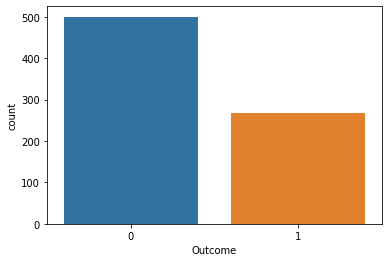

In [13]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

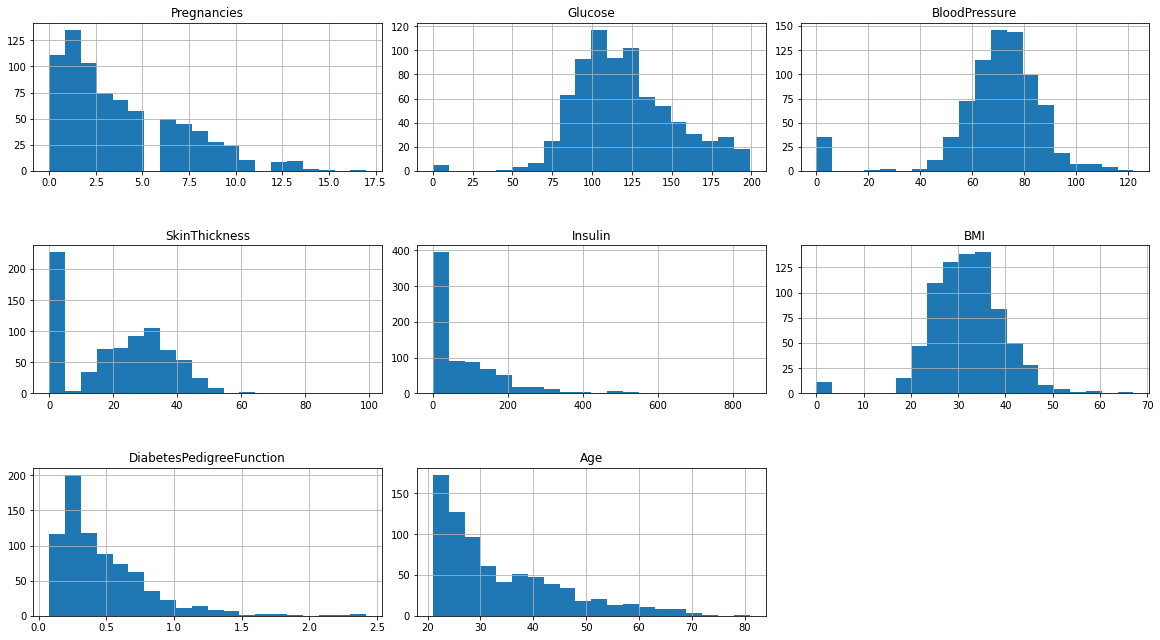

In [14]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int(length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

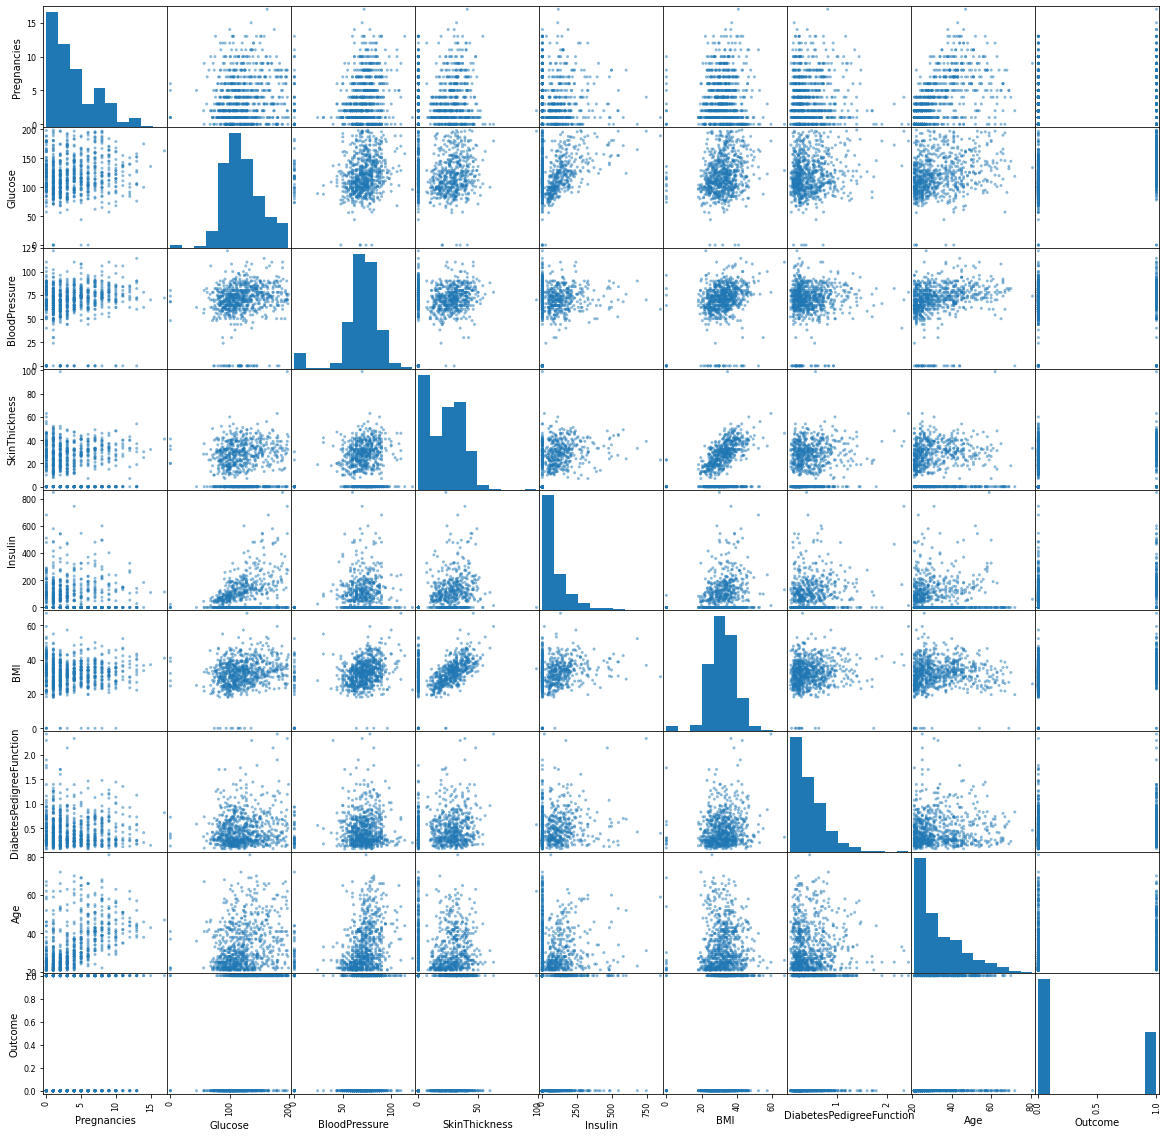

In [15]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

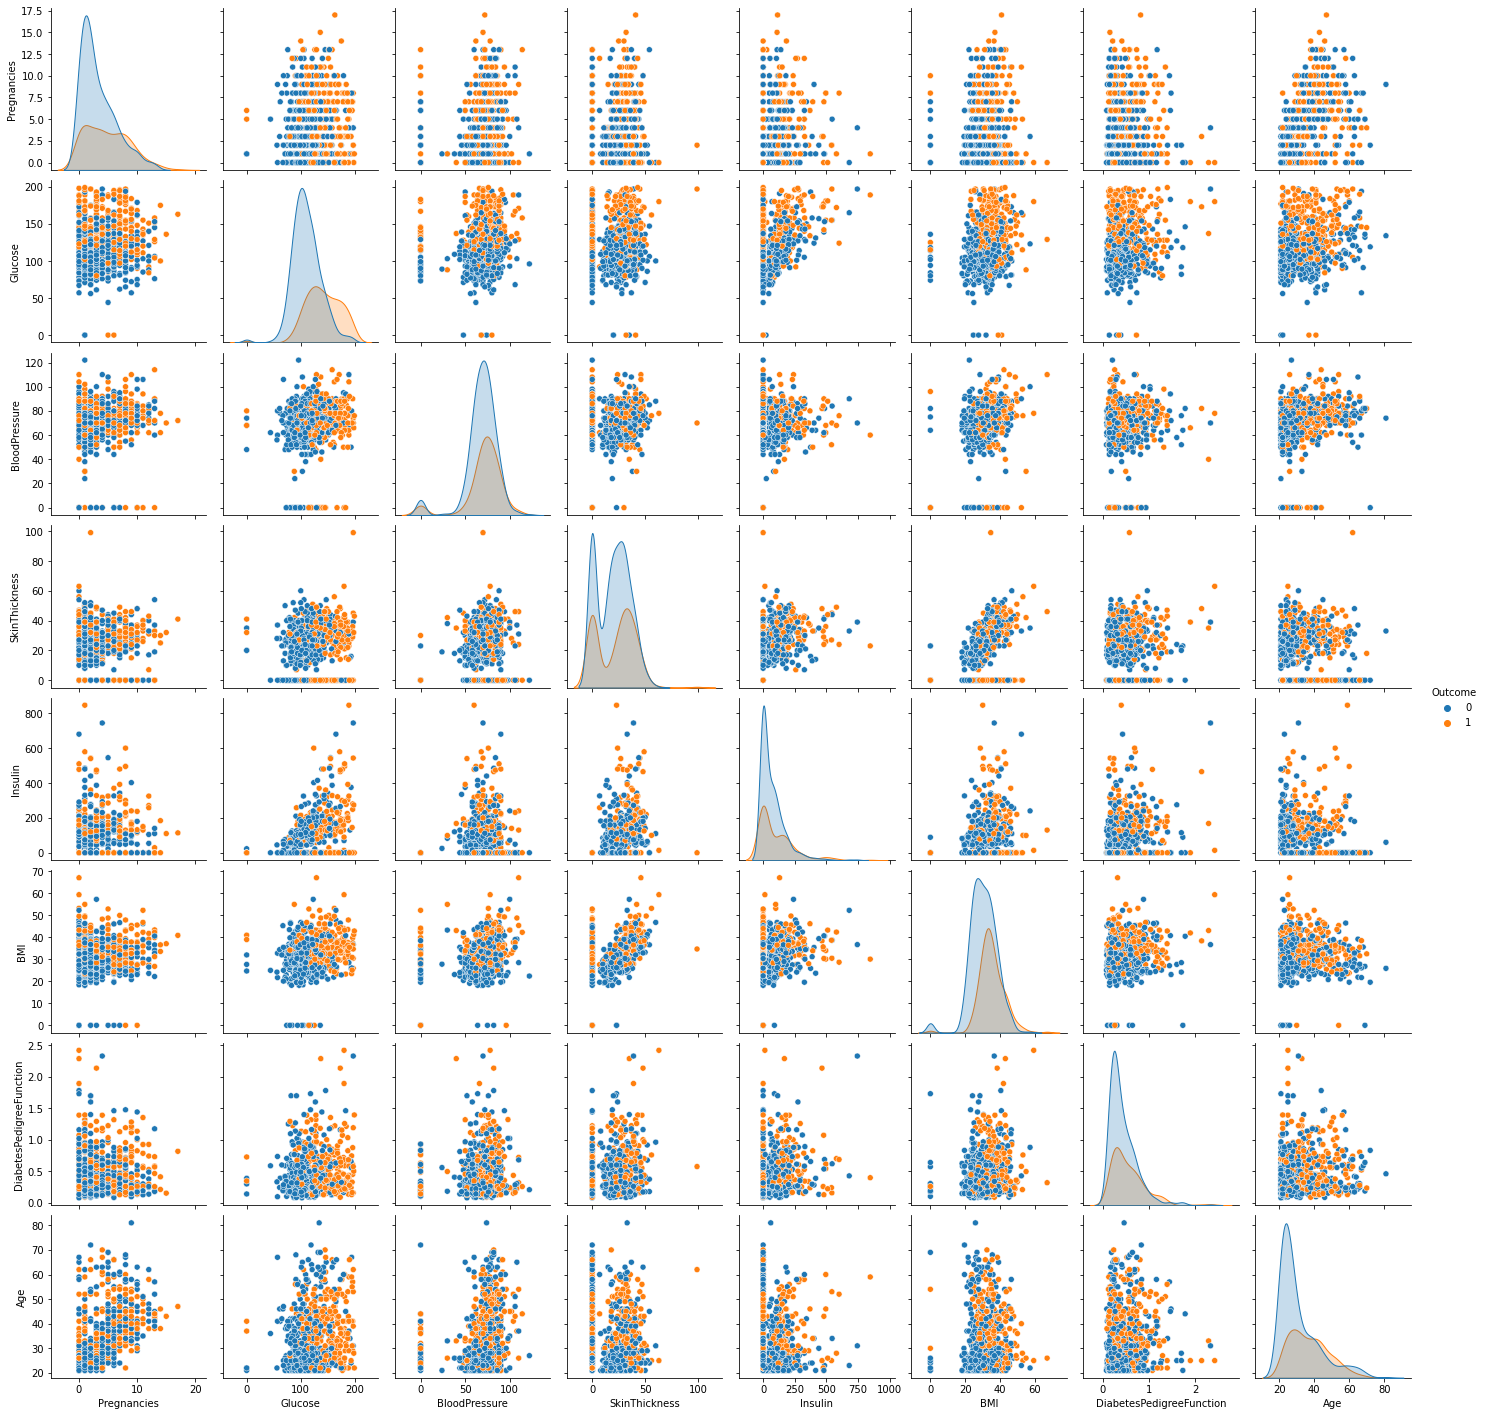

In [16]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome', diag_kind='kde')
plt.show()

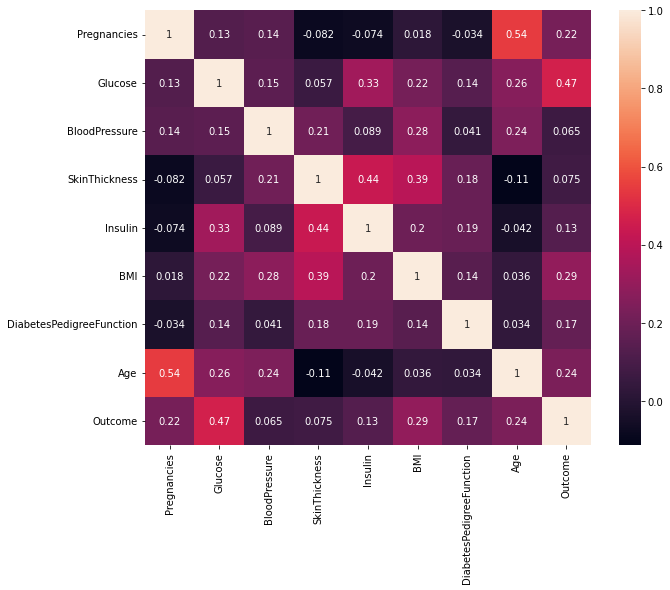

In [17]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [18]:
# dataset = pd.get_dummies(dataset, drop_first= True)

# preg = pd.get_dummies(dataset['Pregnancies'],prefix='Pregnancies',drop_first= True)

# print(preg.head())

# dataset = pd.concat([preg,dataset], axis = 1)
# dataset.drop(columns=['Pregnancies'],inplace=True)

In [19]:
#data_preprocessing
dataset_new = dataset

In [20]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose",
                        "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [21]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [23]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [24]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [25]:
# # Feature scaling using MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler(feature_range = (0, 1))
# dataset_scaled = sc.fit_transform(dataset_new)

In [26]:
# dataset_scaled = pd.DataFrame(dataset_scaled)

In [27]:
# dataset_scaled

In [28]:
# # Selecting features - [Glucose, Insulin, BMI, Age]
# X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
# Y = dataset_scaled.iloc[:, 8].values

In [29]:
# X

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mean


In [31]:
dataset_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
x = dataset_new.drop('Outcome',axis=1)
y=dataset_new['Outcome'].values


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Set the threshold value
threshold = 10

# Initialize SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif,k='all')

# Fit the selector on the data
selector.fit(x, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Set the threshold and select features above the threshold
selected_features = x.columns[scores > threshold]

print(selected_features )

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [37]:
#selected_features = ['age', 'systolic_bp', 'diastolic_bp', 'glucose', 'weight', 'hypertensive', 'cardiovascular_disease']
X_selected = x[selected_features]


In [38]:
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
# Print the selected feature names and their scores
for feature, score in zip(selected_features, sorted_scores):
    print("Feature:", feature)
    print("Score:", score)
    print()

Feature: Pregnancies
Score: 245.85920854104933

Feature: Glucose
Score: 82.56242947356262

Feature: BloodPressure
Score: 46.140611238735865

Feature: SkinThickness
Score: 39.670227393616116

Feature: Insulin
Score: 37.23285512021425

Feature: BMI
Score: 36.911492645116866

Feature: DiabetesPedigreeFunction
Score: 23.871300204344593

Feature: Age
Score: 21.725843828432534



In [39]:
# # Standardize the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [40]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, y, test_size = 0.20,
                                   random_state = 42, stratify = dataset_new['Outcome'] )


In [41]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
Y_train shape: (614,)
Y_test shape: (154,)


In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, Y_train)
#X_test, y_test = ros.fit_resample(X_test, Y_test)

from collections import Counter

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 400, 1: 400})
Testing target statistics: Counter({0: 100, 1: 54})


In [43]:
# # Standardize the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [42]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5

# Initialize lists to store the evaluation results
accuracy_scores = []
loss_scores = []

# Perform cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)
for train_index, val_index in skf.split(X_train_scaled, y_train):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create the ANN model
    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Store the evaluation scores
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of the evaluation scores
mean_loss = np.mean(loss_scores)
mean_accuracy = np.mean(accuracy_scores)
std_loss = np.std(loss_scores)
std_accuracy = np.std(accuracy_scores)

# Print the results
print("Cross-Validation Results:")
print("Loss: {:.4f} (+/- {:.4f})".format(mean_loss, std_loss))
print("Accuracy: {:.4f} (+/- {:.4f})".format(mean_accuracy, std_accuracy))


Cross-Validation Results:
Loss: 0.4815 (+/- 0.0456)
Accuracy: 0.7487 (+/- 0.0283)


In [34]:
# # Plotting a graph for n_neighbors 
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier

# X_axis = list(range(1, 31))
# acc = pd.Series()
# x = range(1,31)

# for i in list(range(1, 31)):
#     knn_model = KNeighborsClassifier(n_neighbors = i) 
#     knn_model.fit(X_train, Y_train)
#     prediction = knn_model.predict(X_test)
#     acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
# plt.plot(X_axis, acc)
# plt.xticks(x)
# plt.title("Finding best value for n_estimators")
# plt.xlabel("n_estimators")
# plt.ylabel("Accuracy")
# plt.grid()
# plt.show()
# print('Highest value: ',acc.values.max())

In [35]:
# K nearest neighbors Algorithm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=24)

In [36]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [38]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [40]:
from sklearn.svm import SVC
svc= SVC(kernel="linear", C=0.005,probability=True)
svc.fit(X_train_scaled, y_train)
Y_pred_svc = svc.predict(X_test_scaled)

In [41]:
# Making predictions on test dataset
Y_pred_knn = knn.predict(X_test_scaled)
Y_pred_svc = svc.predict(X_test_scaled)
Y_pred_nb = nb.predict(X_test_scaled)
Y_pred_dectree = dectree.predict(X_test_scaled)
Y_pred_ranfor = ranfor.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
#accuracy_ranfor = accuracy_score(y_test, Y_pred_svc)

In [43]:
# Accuracy on test set
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
#print("Random Forest: " + str(accuracy_svc * 100))

K Nearest neighbors: 72.72727272727273
Support Vector Classifier: 72.72727272727273
Naive Bayes: 69.48051948051948
Decision tree: 69.48051948051948
Random Forest: 70.77922077922078


In [44]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[74, 26],
       [16, 38]], dtype=int64)

<AxesSubplot:>

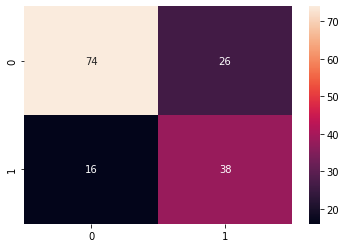

In [45]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [46]:
y_test = Y_test
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [47]:
##Apply adaboosting
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mean

In [48]:
# # Standardize the input features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [56]:
# AdaBoosting

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm_ada = AdaBoostClassifier(base_estimator=svm)
svm_ada.fit(X_train_scaled, y_train)


AdaBoostClassifier(base_estimator=SVC(probability=True))

In [57]:

# Random Forest
rf = RandomForestClassifier(max_depth=5)
rf_ada = AdaBoostClassifier(base_estimator=rf)
rf_ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5))

In [58]:
from sklearn.linear_model import Perceptron
# Naïve Bayes
nb = Perceptron()
nb_ada = AdaBoostClassifier(base_estimator=nb,algorithm='SAMME')
nb_ada.fit(X_train_scaled, y_train)


AdaBoostClassifier(algorithm='SAMME', base_estimator=Perceptron())

In [59]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# AdaBoost with Logistic Regression
logreg_ada = AdaBoostClassifier(base_estimator=logreg)
logreg_ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000))

In [60]:


# Bagging using the voting average technique

# Support Vector Machine (SVM)
svm_bagging = BaggingClassifier(base_estimator=svm, n_estimators=10)
svm_bagging.fit(X_train_scaled, y_train)

# Random Forest
rf_bagging = BaggingClassifier(base_estimator=rf, n_estimators=10)
rf_bagging.fit(X_train_scaled, y_train)

# Naïve Bayes
nb_bagging = BaggingClassifier(base_estimator=nb, n_estimators=10)
nb_bagging.fit(X_train_scaled, y_train)

logreg_bagging = BaggingClassifier(base_estimator=logreg, n_estimators=10)
logreg_bagging.fit(X_train_scaled, y_train)


BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

In [61]:

# Make predictions on the test set
svm_ada_preds = svm_ada.predict(X_test_scaled )
rf_ada_preds = rf_ada.predict(X_test_scaled )
nb_ada_preds = nb_ada.predict(X_test_scaled )
logreg_ada_preds = logreg_ada.predict(X_test_scaled )

svm_bagging_preds = svm_bagging.predict(X_test_scaled )
rf_bagging_preds = rf_bagging.predict(X_test_scaled )
nb_bagging_preds = nb_bagging.predict(X_test_scaled )
logreg_bagging_preds = logreg_bagging.predict(X_test_scaled )



In [62]:
from scipy.stats import mode

# Convert predictions to 1D arrays
svm_ada_preds = svm_ada_preds.ravel()
rf_ada_preds = rf_ada_preds.ravel()
nb_ada_preds = nb_ada_preds.ravel()
logreg_ada_preds = logreg_ada_preds.ravel()
svm_bagging_preds = svm_bagging_preds.ravel()
rf_bagging_preds = rf_bagging_preds.ravel()
nb_bagging_preds = nb_bagging_preds.ravel()
logreg_bagging_preds = logreg_bagging_preds.ravel()

# Ensemble predictions using voting average technique
ensemble_preds = mode([svm_ada_preds, rf_ada_preds, nb_ada_preds, logreg_ada_preds,
                       svm_bagging_preds, rf_bagging_preds, nb_bagging_preds, logreg_bagging_preds], axis=0)[0]

print(ensemble_preds)
ensemble_preds = ensemble_preds.reshape(y_test.shape)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy:", accuracy)


[[1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0
  0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0
  0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0
  1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0
  0 0 1 1 1 0 0 0 1 0]]
Accuracy: 0.7597402597402597


In [63]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ensemble_preds)
cm

array([[79, 21],
       [16, 38]], dtype=int64)

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import NuSVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier


In [50]:
# Define classifiers
classifiers = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'AdaBoost': AdaBoostClassifier(),
    #'XGBoost': XGBClassifier(),
    'PAC': PassiveAggressiveClassifier(),
    'RC': RidgeClassifierCV(),
    #'Nu-SVC': NuSVC(),
    'LSVC': LinearSVC(),
    'CCCV': CalibratedClassifierCV(),
    'NC': NearestCentroid(),
    'GPC': GaussianProcessClassifier(),
    #'MNB': MultinomialNB(),
    #'ComplementNB': ComplementNB(),
    #'BNB': BernoulliNB(),
    #'CategoricalNB': CategoricalNB(),
    'Bagging': BaggingClassifier(),
    'ET': ExtraTreesClassifier(),
    'GBC': GradientBoostingClassifier(),
    'HGBC': HistGradientBoostingClassifier(),
    #'OVsRC': OneVsRestClassifier(),
    'MLP': MLPClassifier(),
    'LP': LabelPropagation(),
    'LS': LabelSpreading(),
    #'Stacking': StackingClassifier(),
    'RCCV': RidgeClassifierCV(),
    'LRCV': LogisticRegressionCV(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LGBM': LGBMClassifier()
}

# Initialize result dataframe
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(results)
    results = results.append({'Classifier': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

# Print results
print(results)

Empty DataFrame
Columns: [Classifier, Accuracy, Precision, Recall, F1 Score]
Index: []
  Classifier  Accuracy Precision    Recall  F1 Score
0        SGD  0.694805  0.547945  0.740741  0.629921
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.694805  0.547945  0.740741  0.629921
1  Perceptron  0.662338  0.514706  0.648148   0.57377
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.694805  0.547945  0.740741  0.629921
1  Perceptron  0.662338  0.514706  0.648148   0.57377
2    AdaBoost  0.733766  0.603175  0.703704  0.649573
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.694805  0.547945  0.740741  0.629921
1  Perceptron  0.662338  0.514706  0.648148   0.57377
2    AdaBoost  0.733766  0.603175  0.703704  0.649573
3         PAC  0.714286  0.619048  0.481481  0.541667
   Classifier  Accuracy Precision    Recall  F1 Score
0         SGD  0.694805  0.547945  0.740741  0.629921
1  Perceptron  0.662338  0.514706  0.648148   0.573

    Classifier  Accuracy Precision    Recall  F1 Score
0          SGD  0.694805  0.547945  0.740741  0.629921
1   Perceptron  0.662338  0.514706  0.648148   0.57377
2     AdaBoost  0.733766  0.603175  0.703704  0.649573
3          PAC  0.714286  0.619048  0.481481  0.541667
4           RC  0.727273  0.603448  0.648148     0.625
5         LSVC  0.733766  0.606557  0.685185  0.643478
6         CCCV  0.733766  0.603175  0.703704  0.649573
7           NC  0.694805  0.552239  0.685185   0.61157
8          GPC  0.714286  0.575758  0.703704  0.633333
9      Bagging   0.74026  0.634615  0.611111  0.622642
10          ET   0.74026  0.645833  0.574074  0.607843
11         GBC  0.746753  0.622951  0.703704   0.66087
12        HGBC  0.727273  0.611111  0.611111  0.611111
13         MLP  0.727273  0.596774  0.685185  0.637931
14          LP  0.688312      0.56  0.518519  0.538462
15          LS  0.688312      0.56  0.518519  0.538462
16        RCCV  0.727273  0.603448  0.648148     0.625
    Classi

In [52]:
results

,Classifier,Accuracy,Precision,Recall,F1 Score
0,SGD,0.694805,0.547945,0.740741,0.629921
1,Perceptron,0.662338,0.514706,0.648148,0.57377
2,AdaBoost,0.733766,0.603175,0.703704,0.649573
3,PAC,0.714286,0.619048,0.481481,0.541667
4,RC,0.727273,0.603448,0.648148,0.625
5,LSVC,0.733766,0.606557,0.685185,0.643478
6,CCCV,0.733766,0.603175,0.703704,0.649573
7,NC,0.694805,0.552239,0.685185,0.61157
8,GPC,0.714286,0.575758,0.703704,0.633333
9,Bagging,0.74026,0.634615,0.611111,0.622642


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [68]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf', C=10.0,probability=True),
    #SVC(gamma=2, C=0.005,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    MultinomialNB(),
    QuadraticDiscriminantAnalysis(),
]

In [69]:
#code reference : https://www.kaggle.com/code/davidfumo/comparing-11-classification-models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

ValueError: Found input variables with inconsistent numbers of samples: [800, 614]

In [70]:
# Create the ANN model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)

NameError: name 'Sequential' is not defined

In [71]:
#Voting cLASSIFIER


In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import NuSVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [74]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [106]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LP', LabelPropagation()))
estimator.append((  'LS', LabelSpreading()))
estimator.append(('RandomForest', DecisionTreeClassifier(criterion = 'entropy', random_state = 42) ))
#estimator.append(('KNN', KNeighborsClassifier() ))
estimator.append(( 'LGBM', LGBMClassifier()))
estimator.append(( 'HGBC', HistGradientBoostingClassifier() ))
estimator.append(('ET', ExtraTreesClassifier() ))
estimator.append(( 'GBC', GradientBoostingClassifier()))
estimator.append(('Bagging', BaggingClassifier()))

In [110]:
VC_hard_p = VotingClassifier(estimators = estimator, voting ='hard')
# VC_hard.fit(X_train_scaled, y_train)
# y_pred = VC_hard.predict(X_test_scaled)

In [111]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7402597402597403


In [112]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 300,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [86]:
rf = RandomForestClassifier()

In [87]:
rf.fit(X_train_scaled, y_train)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [88]:
y_pred = VC_hard.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7467532467532467


In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
cv_results = cross_validate(VC_hard_p,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [114]:
cv_results


{'fit_time': array([1.28626347, 1.27229261, 1.30225849, 1.29326177, 1.18834138]),
 'score_time': array([0.07395768, 0.05894589, 0.05796456, 0.05996537, 0.05894542]),
 'test_accuracy': array([nan, nan, nan, nan, nan]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_roc_auc': array([nan, nan, nan, nan, nan])}

In [94]:
cv_results['test_f1'].mean()

0.8495951152034398

In [96]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [97]:
# Train Error
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [98]:
# Test Error
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       100
           1       0.53      0.52      0.52        54

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



In [129]:
estimators = []
estimators.append(('Neural Network', MLPClassifier(max_iter=10000)))
estimators.append(('LP', LabelPropagation()))
estimators.append(('LS', LabelSpreading()))
estimators.append(('RandomForest', DecisionTreeClassifier(criterion='entropy', random_state=42)))
estimators.append(('LGBM', LGBMClassifier()))
estimators.append(('HGBC', HistGradientBoostingClassifier()))
estimators.append(('ET', ExtraTreesClassifier()))
estimators.append(('GBC', GradientBoostingClassifier()))
estimators.append(('Bagging', BaggingClassifier()))

# Create the VotingClassifier
VC = VotingClassifier(estimators=estimators, voting='hard')

# Perform k-fold cross-validation
k = 5  # Number of folds
# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1_score': 'f1_macro'
}

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_results = cross_validate(VC_hard, X_train, y_train, cv=k, scoring=scoring)  # X and y are your input features and labels

# Extract the scores
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1_score']

# Print the cross-validation scores
print("Cross-Validation Scores:")
print("Accuracy: {:.2f}".format(accuracy_scores.mean()))
print("Precision: {:.2f}".format(precision_scores.mean()))
print("Recall: {:.2f}".format(recall_scores.mean()))
print("F1 Score: {:.2f}".format(f1_scores.mean()))

ValueError: Found input variables with inconsistent numbers of samples: [614, 800]

In [127]:
scores

array([0.80625, 0.8    , 0.83125, 0.95   , 0.925  ])

In [125]:
print("Mean Accuracy: {:.2f}".format(scores.mean()))

Mean Accuracy: 0.86


In [46]:
## Explainablibily

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer


In [61]:
feature_names = X_test.columns

In [62]:
# Choose a test case for which you want to explain the decision
test_case_index = 4
test_case = X_test.iloc[4]

# Define feature names (replace with your feature names)
#X_test.columns

In [88]:
X_test.iloc[4]

Pregnancies                   2.000000
Glucose                      74.000000
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.102000
Age                          22.000000
Name: 81, dtype: float64

In [63]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="classification", training_labels=y_train,feature_names=feature_names, random_state=42)

# Explain the prediction for the selected test case


In [64]:
explanation = explainer.explain_instance(test_case.values, ranfor.predict_proba)

In [65]:

# Print the explanation
explanation.show_in_notebook()

In [66]:
import shap

In [76]:
import shap
import graphviz 
explainer = shap.TreeExplainer(ranfor)
shap_values = explainer.shap_values(X_train)

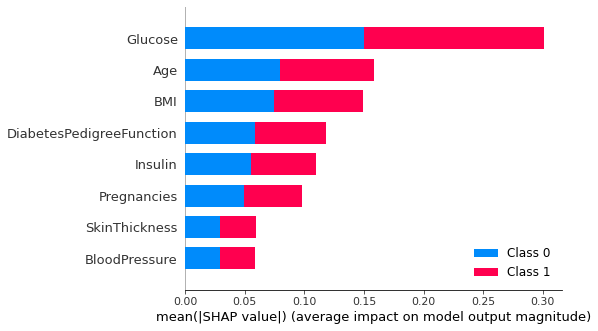

In [77]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [81]:
# Calculate permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(ranfor, X_test, Y_test, n_repeats=30, random_state=42)

# Print the results
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f}")

Glucose: 0.0474
BMI: 0.0318
BloodPressure: 0.0074
Age: 0.0069
Insulin: 0.0045
Pregnancies: -0.0024
DiabetesPedigreeFunction: -0.0156
SkinThickness: -0.0431


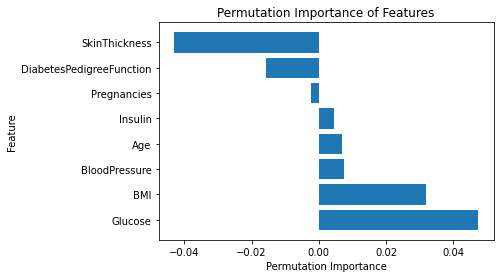

In [82]:
# Create a horizontal bar plot
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance of Features')
plt.show()

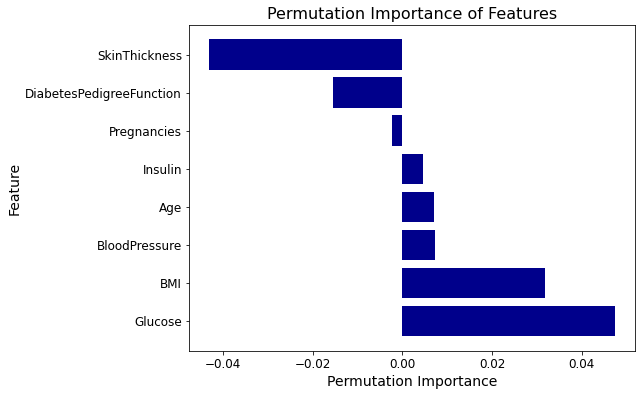

In [87]:
# Calculate permutation importance
perm_importance = permutation_importance(ranfor, X_test, Y_test, n_repeats=30, random_state=42)

# Create a horizontal bar plot
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(8, 6))  # Set the figure size
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], color='darkblue')  # Set the bar color
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], fontsize=12)  # Set y-tick labels and font size
plt.xticks(fontsize=12)  # Set x-tick font size
plt.xlabel('Permutation Importance', fontsize=14)  # Set x-label and font size
plt.ylabel('Feature', fontsize=14)  # Set y-label and font size
plt.title('Permutation Importance of Features', fontsize=16)  # Set title and font size
plt.show()


